In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-eda/train.csv


# Black Friday Sales EDA

In [2]:
# Importing additional Libarary for better understanding.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
# Importing data
data=pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')
data.head(4)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057


In [4]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
data.shape

(550068, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
data.isnull().sum() # checking null values

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

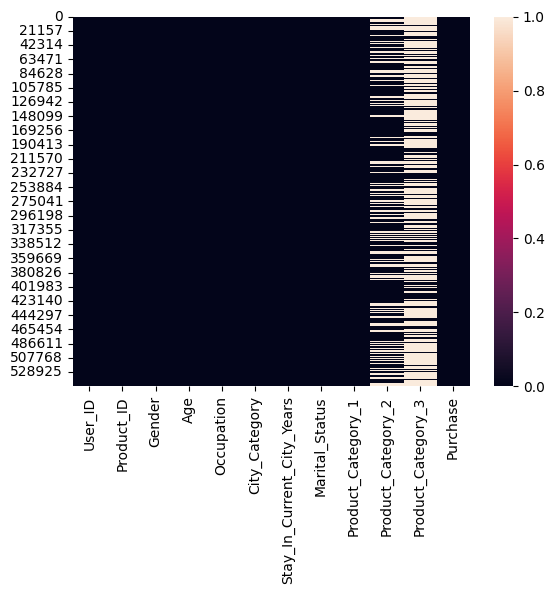

In [11]:
sns.heatmap(data.isnull())
plt.show()

Note: From the above heatmap its showing that we have null values in Product_Category_2 & Product_Category_3

In [12]:
data['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [14]:
data.duplicated().sum()  # Checking duplicated values

0

In [15]:
data.head(4)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057


In [23]:
data.rename(columns={'Stay_In_Current_City_Years':'City','Product_Category_1':'Product1','Product_Category_2':'Product2','Product_Category_3':'Product3'},inplace=True)

In [18]:
data.head() # Name chage done

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,City,Marital_Status,Product1,Product2,Product3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [24]:
data.drop(['Product_ID'],inplace=True,axis=1) # Drop Product Id

In [25]:
data.head()

,User_ID,Gender,Age,Occupation,City_Category,City,Marital_Status,Product1,Product2,Product3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [26]:
data['City'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [27]:
def Cities(x):
    if '+' in x:
        x=x.replace('+','')
        return int(x)
    else:
        return int(x)

In [28]:
data['City']=data['City'].apply(Cities)

In [29]:
data['City'].unique() # we have remove '+' sign

array([2, 4, 3, 1, 0])

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   User_ID         550068 non-null  int64  
 1   Gender          550068 non-null  object 
 2   Age             550068 non-null  object 
 3   Occupation      550068 non-null  int64  
 4   City_Category   550068 non-null  object 
 5   City            550068 non-null  int64  
 6   Marital_Status  550068 non-null  int64  
 7   Product1        550068 non-null  int64  
 8   Product2        376430 non-null  float64
 9   Product3        166821 non-null  float64
 10  Purchase        550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


In [31]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [32]:
data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [33]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [35]:
data['City'].unique()

array([2, 4, 3, 1, 0])

In [36]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [39]:
data['Age'].replace({'0-17':'child','18-25':'teenage','26-35':'adult','36-45':'adult','46-50':'adult','51-55':'old','55+':'old'},inplace=True)

In [40]:
data['Age'].unique() # Change age into category type

array(['child', 'old', 'adult', 'teenage'], dtype=object)

In [41]:
data['Marital_Status'].unique()

array([0, 1])

In [42]:
data['Marital_Status'].value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

Note: Marital_Status showing single is 324731 and married is 225337.

In [43]:
data['Product1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [47]:
data['Product2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [45]:
data['Product2'].value_counts()

Product2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [48]:
data['Product2'].isnull().sum()

173638

In [50]:
(data['Product2'].isnull().sum()/len(data))*100      # 31.56% of total data is null showing in product 2.

31.56664266963357

In [54]:
data['Product2'].isnull()

0          True
1         False
2          True
3         False
4          True
          ...  
550063     True
550064     True
550065     True
550066     True
550067     True
Name: Product2, Length: 550068, dtype: bool

In [57]:
data['Age'].value_counts()

Age
adult      375301
teenage     99660
old         60005
child       15102
Name: count, dtype: int64

In [60]:
m=data.groupby('Age')['Product2'].agg(pd.Series.mode)
m

Age
adult      8.0
child      4.0
old        8.0
teenage    8.0
Name: Product2, dtype: float64

In [63]:
for p in m.index:
    data.loc[(data['Age']==p) & (data['Product2'].isnull()),'Product2']=m[p]

In [66]:
data['Product2'].isnull().sum()

0

In [65]:
data.head(4)

,User_ID,Gender,Age,Occupation,City_Category,City,Marital_Status,Product1,Product2,Product3,Purchase
0,1000001,F,child,10,A,2,0,3,4.0,NaN,8370
1,1000001,F,child,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,child,10,A,2,0,12,4.0,NaN,1422
3,1000001,F,child,10,A,2,0,12,14.0,NaN,1057


In [67]:
data['Product3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [68]:
(data['Product3'].isnull().sum()/len(data))*100  # 69.67% of total data is null showing in product 3

69.67265865311198

In [73]:
p=data.groupby('Age')['Product3'].agg(pd.Series.mode)
p

Age
adult      16.0
child      16.0
old        16.0
teenage    16.0
Name: Product3, dtype: float64

In [74]:
for m in p.index:
    data.loc[(data['Age']== m) & (data['Product3'].isnull()),'Product3']=p[m]

In [76]:
data['Product3'].isnull().sum()


0

In [77]:
data.info() # Now data cleaning id done

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   User_ID         550068 non-null  int64  
 1   Gender          550068 non-null  object 
 2   Age             550068 non-null  object 
 3   Occupation      550068 non-null  int64  
 4   City_Category   550068 non-null  object 
 5   City            550068 non-null  int64  
 6   Marital_Status  550068 non-null  int64  
 7   Product1        550068 non-null  int64  
 8   Product2        550068 non-null  float64
 9   Product3        550068 non-null  float64
 10  Purchase        550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


In [78]:
data.isnull().sum()

User_ID           0
Gender            0
Age               0
Occupation        0
City_Category     0
City              0
Marital_Status    0
Product1          0
Product2          0
Product3          0
Purchase          0
dtype: int64

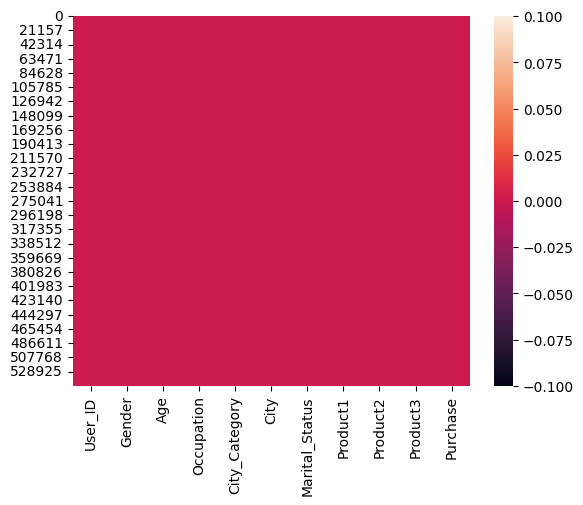

In [80]:
sns.heatmap(data.isnull())
plt.show()

Note: In above graph there is no null value present

# Data Visualization

In [81]:
data.head(4)

,User_ID,Gender,Age,Occupation,City_Category,City,Marital_Status,Product1,Product2,Product3,Purchase
0,1000001,F,child,10,A,2,0,3,4.0,16.0,8370
1,1000001,F,child,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,child,10,A,2,0,12,4.0,16.0,1422
3,1000001,F,child,10,A,2,0,12,14.0,16.0,1057


Text(0.5, 1.0, 'Age vs Purchased')

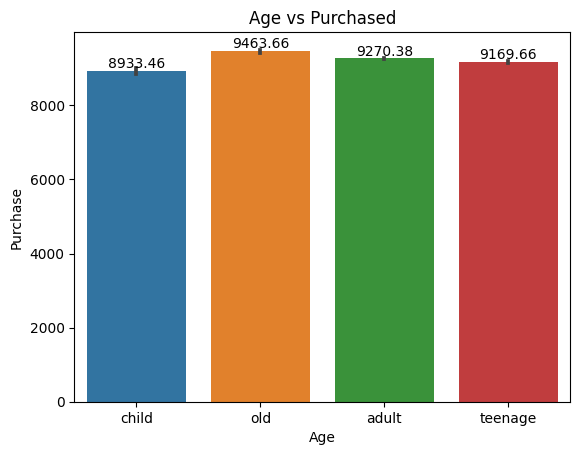

In [87]:
# Age vs Purchased

ax=sns.barplot(x='Age',y='Purchase',data=data)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Age vs Purchased')

Note: From the above graph showing purchage rate of Old age is highest and Child is lowest.

In [88]:
data.head(4)

,User_ID,Gender,Age,Occupation,City_Category,City,Marital_Status,Product1,Product2,Product3,Purchase
0,1000001,F,child,10,A,2,0,3,4.0,16.0,8370
1,1000001,F,child,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,child,10,A,2,0,12,4.0,16.0,1422
3,1000001,F,child,10,A,2,0,12,14.0,16.0,1057


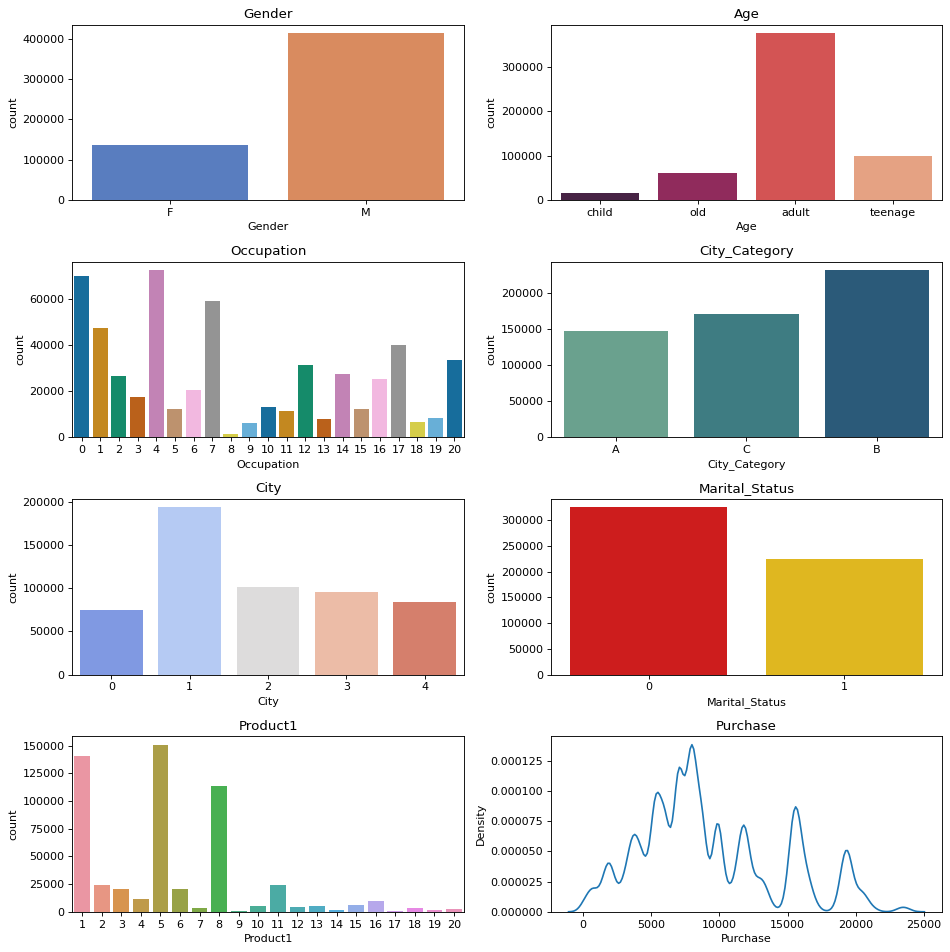

In [113]:
# visualize individul column

plt.figure(figsize=(12,12),dpi=80)
plt.subplot(4,2,1)
plt.title('Gender')
sns.countplot(x='Gender',data=data,palette='muted')

plt.subplot(4,2,2)
plt.title('Age')
sns.countplot(x='Age',data=data,palette='rocket')

plt.subplot(4,2,3)
plt.title('Occupation')
sns.countplot(x='Occupation',data=data,palette='colorblind')

plt.subplot(4,2,4)
plt.title('City_Category')
sns.countplot(x='City_Category',data=data,palette='crest')

plt.subplot(4,2,5)
plt.title('City')
sns.countplot(x='City',data=data,palette='coolwarm')

plt.subplot(4,2,6)
plt.title('Marital_Status')
sns.countplot(x='Marital_Status',data=data, palette='hot')

plt.subplot(4,2,7)
plt.title('Product1')
sns.countplot(x='Product1',data=data)


plt.subplot(4,2,8)
plt.title('Purchase')
ax.set_ylim(0,0.00015)
ax.set_xlim(0,26000)
sns.kdeplot(data['Purchase'])



plt.tight_layout()
plt.show()

Note: 

Gender:
The graph shows that males are greater than females.

Age:
The graph shows that Adults are more visiting as compared with others and the least visiting store are children.

Marital status:
The graph shows that a single person has more visits to a store as compared with a married.

Purchase:
The graph shows that customers are buying from  5000 to 10000 range is higher.
The highest purchases go up to 25000.

City:
The graph shows that store 1 has the highest visits of customers and the lowest visits in store 0.
By this, we can conclude that we need to give more offers to store 0 to increase customer visits and keep the product that customers want in-store 0 location.


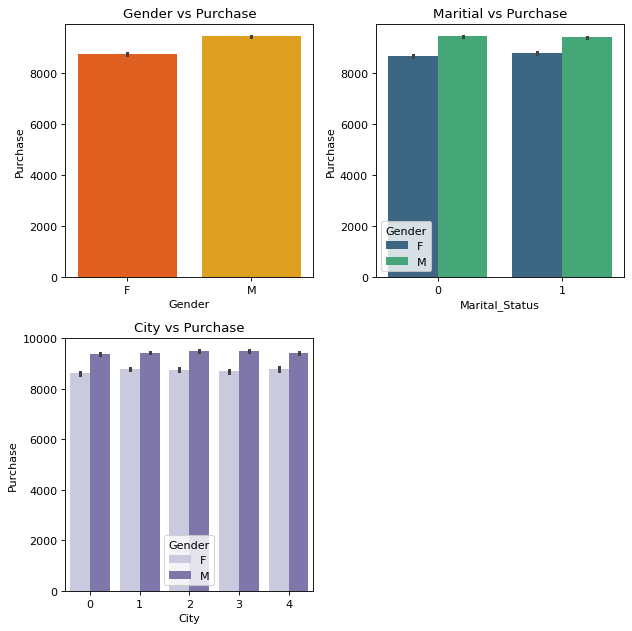

In [120]:
plt.figure(figsize=(8,8),dpi=80)
plt.subplot(2,2,1)
plt.title('Gender vs Purchase')
sns.barplot(x='Gender',y='Purchase',data=data,palette='autumn')

plt.subplot(2,2,2)
plt.title('Maritial vs Purchase')
sns.barplot(x='Marital_Status',y='Purchase', data=data,hue='Gender', palette='viridis')

plt.subplot(2,2,3)
plt.title('City vs Purchase')
sns.barplot(data=data,x='City',y='Purchase',hue='Gender',palette='Purples')

plt.tight_layout()
plt.show()

Note:

By this 3 plotted graph we conclude that male has a higher purchase rate than female


male > female(purchase)

In [121]:
data.head(4)

,User_ID,Gender,Age,Occupation,City_Category,City,Marital_Status,Product1,Product2,Product3,Purchase
0,1000001,F,child,10,A,2,0,3,4.0,16.0,8370
1,1000001,F,child,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,child,10,A,2,0,12,4.0,16.0,1422
3,1000001,F,child,10,A,2,0,12,14.0,16.0,1057


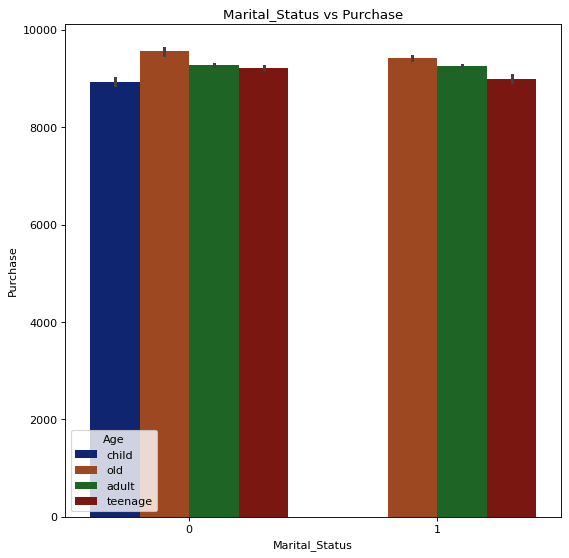

In [123]:
# Plotting purchase vs product1


plt.figure(figsize=(8,8),dpi=80)
plt.title('Marital_Status vs Purchase')
sns.barplot(x='Marital_Status',y='Purchase',data=data,hue='Age',palette='dark')
plt.show()

,Age
Age,
adult,375301
child,15102
old,60005
teenage,99660


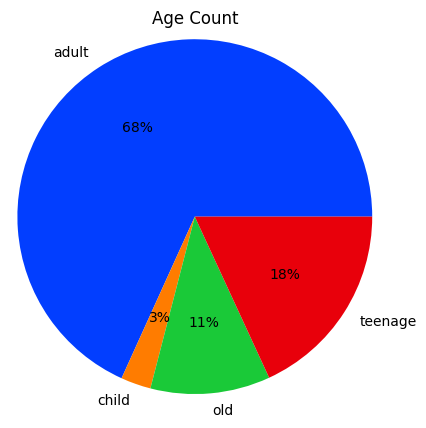

In [129]:
#Age count

a=data.groupby('Age')['Age'].count()
display(a.to_frame())
plt.title('Age Count')
palette_color=sns.color_palette('bright')
plt.pie(a,colors=palette_color,labels=a.index,radius=1.2,autopct='%.0f%%')
plt.show()

In [130]:
data.head(3)

,User_ID,Gender,Age,Occupation,City_Category,City,Marital_Status,Product1,Product2,Product3,Purchase
0,1000001,F,child,10,A,2,0,3,4.0,16.0,8370
1,1000001,F,child,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,child,10,A,2,0,12,4.0,16.0,1422


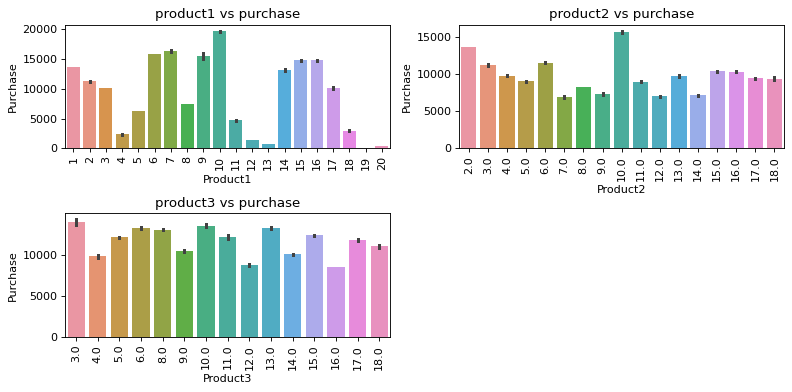

In [139]:
#Plotting products vs purchase rate

plt.figure(figsize=(10,5),dpi=80)
plt.subplot(2,2,1)
plt.title('product1 vs purchase')
sns.barplot(data=data,x='Product1',y='Purchase')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('product2 vs purchase')
sns.barplot(data=data,x='Product2', y='Purchase')
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.title('product3 vs purchase')
sns.barplot(data=data,x='Product3',y='Purchase')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

Note:

In this graph of Product 1 and Product 2, the 10th product is more purchase.
In product 3 the 3rd product is more purchased compared to all.

In [140]:
data.head(4)

,User_ID,Gender,Age,Occupation,City_Category,City,Marital_Status,Product1,Product2,Product3,Purchase
0,1000001,F,child,10,A,2,0,3,4.0,16.0,8370
1,1000001,F,child,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,child,10,A,2,0,12,4.0,16.0,1422
3,1000001,F,child,10,A,2,0,12,14.0,16.0,1057


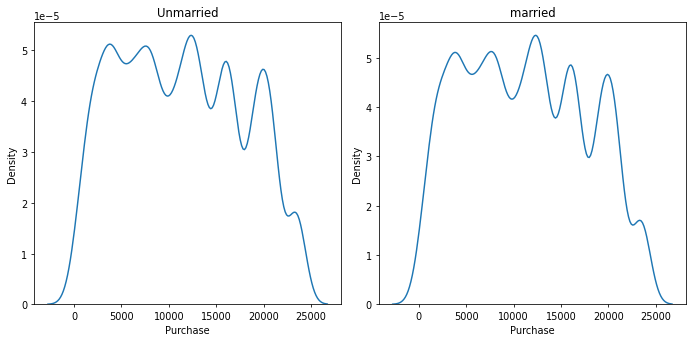

In [150]:
um=data[data['Marital_Status']==0].value_counts('Purchase')
m=data[data['Marital_Status']==1].value_counts('Purchase')


plt.figure(figsize=(10,5),dpi=70)
plt.subplot(1,2,1)
plt.title('Unmarried')
sns.kdeplot(data=um,x='Purchase')

plt.subplot(1,2,2)
plt.title('married')
sns.kdeplot(data=m,x='Purchase')

plt.tight_layout()
plt.show()

Note: 

The purchase distribution of both 'Unmarried' and 'married' customers is quite the same.


In [153]:
data.head(4)

,User_ID,Gender,Age,Occupation,City_Category,City,Marital_Status,Product1,Product2,Product3,Purchase
0,1000001,F,child,10,A,2,0,3,4.0,16.0,8370
1,1000001,F,child,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,child,10,A,2,0,12,4.0,16.0,1422
3,1000001,F,child,10,A,2,0,12,14.0,16.0,1057


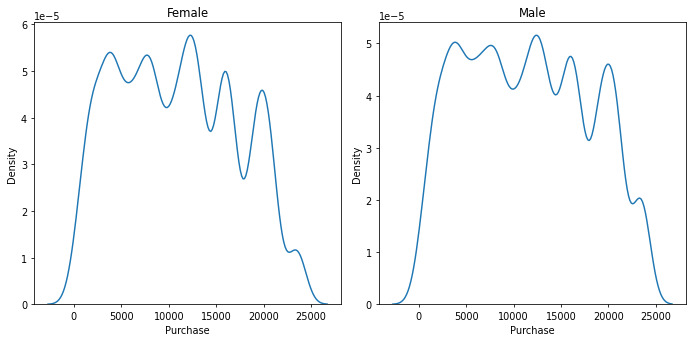

In [158]:
f=data[data['Gender']=='F'].value_counts('Purchase')
m=data[data['Gender']=='M'].value_counts('Purchase')

plt.figure(figsize=(10,5), dpi=70)
plt.subplot(1,2,1)
plt.title('Female')
sns.kdeplot(data=f,x='Purchase')


plt.subplot(1,2,2)
plt.title('Male')
sns.kdeplot(data=m,x='Purchase')

plt.tight_layout()
plt.show()

Note: 

The purchase distribution of both 'Female' and 'Male' customers is quite the same.


# Conclusion:

In the Given dataset. I explored and learned many things like, How to fill NaN values. Where we can use the concept of code reusability. In the process of cleaning the dataset, I used Pandas and Numpy libraries. Using pandas and numpy I removed unwanted(useless) data created new data frames and got useful data for my research. After cleaning my data I used Seaborn and Matplotlib libraries to read my data by visualizing it. I created questions regarding my research I tried to solve them by visualizing and applying conditions. Now, they want to build a model to predict the purchase amount of customers against various products which will help them to create personalized offers for customers against different products. By seeing this EDA we can fulfill this requirement.